In [35]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from statistics import mean
from scipy.stats import pearsonr # 科学技術計算ライブラリ
import matplotlib.pyplot as plt
%matplotlib inline

# Load CSV

In [57]:
k = 9
model_name = 'SAD2axis'
manualseed = 0
pretrained = True
batch_size = 64
lr = 0.001
idx = 1

save_dir = '/home/taki/bento_VL/log/epoch30_en_visal512_text512_bottle128_optimAdam_batch32_w,h640_lr0.0001_wDecay0.001_seed0/'

col = ["color","healthy","satisfaction","uniqueness","ease of eating","appropriate amount","not collapse"]

csv_test0 = save_dir + 'closs_valid0/test_out_df.csv'
csv_test1 = save_dir + 'closs_valid1/test_out_df.csv'
csv_test2 = save_dir + 'closs_valid2/test_out_df.csv'
csv_test3 = save_dir + 'closs_valid3/test_out_df.csv'
csv_test4 = save_dir + 'closs_valid4/test_out_df.csv'


outdf_test0 = pd.read_csv(csv_test0, header=0)
outdf_test1 = pd.read_csv(csv_test1, header=0)
outdf_test2 = pd.read_csv(csv_test2, header=0)
outdf_test3 = pd.read_csv(csv_test3, header=0)
outdf_test4 = pd.read_csv(csv_test4, header=0)

test_out_df = pd.concat([outdf_test0, outdf_test1, outdf_test2, outdf_test3, outdf_test4])
test_out_df = test_out_df.reset_index(drop=True)
test_out_df = test_out_df.drop(columns=['Unnamed: 0'])
test_out_df.columns = col

testdf_0 = save_dir + 'closs_valid0/test_score_df.csv'
testdf_1 = save_dir + 'closs_valid1/test_score_df.csv'
testdf_2 = save_dir + 'closs_valid2/test_score_df.csv'
testdf_3 = save_dir + 'closs_valid3/test_score_df.csv'
testdf_4 = save_dir + 'closs_valid4/test_score_df.csv'

testdf_0 = pd.read_csv(testdf_0, header=0)
testdf_1 = pd.read_csv(testdf_1, header=0)
testdf_2 = pd.read_csv(testdf_2, header=0)
testdf_3 = pd.read_csv(testdf_3, header=0)
testdf_4 = pd.read_csv(testdf_4, header=0)

test_score_df = pd.concat([testdf_0, testdf_1, testdf_2, testdf_3, testdf_4])
test_score_df = test_score_df.reset_index(drop=True)
test_score_df = test_score_df.drop(columns=['Unnamed: 0'])
test_score_df.columns = col

# df同士を横に結合
df_test = pd.concat([test_out_df, test_score_df], axis=1)

## 交差検証のデータごとに相関係数だす

In [58]:
out_df_list   = [outdf_test0, outdf_test1, outdf_test2, outdf_test3, outdf_test4]
score_df_list = [testdf_0, testdf_1, testdf_2, testdf_3, testdf_4]

for i in range(5):
    # Unnamed: 0を削除
    out_df_list[i] = out_df_list[i].drop(columns=['Unnamed: 0'])
    score_df_list[i] = score_df_list[i].drop(columns=['Unnamed: 0'])
    out_df_list[i].columns = col
    score_df_list[i].columns = col

score_df_list[0]

color   healthy  satisfaction  uniqueness  ease of eating  \
0   0.614850  0.703827      0.516899    0.355846        0.340705   
1   0.722345  0.552957      0.789054    0.320820        0.630137   
2   0.311090  0.171269      0.653765    0.558248        0.137684   
3   0.517619  0.547010      0.501610    0.572988        0.425317   
4   0.512488  0.503145      0.598660    0.248535        0.510517   
..       ...       ...           ...         ...             ...   
95  0.578645  0.733581      0.555909    0.317758        0.441363   
96  0.593887  0.401824      0.948750    0.327519        0.554145   
97  0.442782  0.591034      0.481481    0.271817        0.624487   
98  0.816748  0.604335      0.386831    0.504492        0.415532   
99  0.628817  0.743233      0.506016    0.450978        0.579951   

    appropriate amount  not collapse  
0             0.506452      0.387463  
1             0.761522      0.410298  
2             0.411813      0.355065  
3             0.512747      0.252673  
4             0.684497      0.420689  
..                 ...           ...  
95            0.567137      0.331348  
96            0.432028      0.426609  
97            0.913383      0.547340  
98            0.628137      0.522666  
99            0.667277      0.403023  

[100 rows x 7 columns]

In [59]:

corr_list = []
p_list = []
mae_df_list = []
for idx in range(0,5):
    #print(f"~~~~~~~~~~K={idx}~~~~~~~~~~~~~~~~~~~")
    corr_tmp = []
    p_tmp = []
    mae_df_list.append(abs(out_df_list[idx]-score_df_list[idx]))
    for i in range(len(col)):
                
        #print("MAE=", mae_df[col[i]].mean(), "±", mae_df[col[i]].std())
        a, b = pearsonr(score_df_list[idx][col[i]], out_df_list[idx][col[i]]) # リストを整形し相関係数:aとp値:bの計算
        #print("相関係数:", a)
        #print("p値:", b)
        corr_tmp.append(a)
        p_tmp.append(b)
    corr_list.append(corr_tmp)
    p_list.append(p_tmp)


In [60]:
t_df = pd.DataFrame(corr_list)
t_df

0         1         2         3         4         5         6
0  0.758817  0.704483  0.688639  0.703082  0.688545  0.380821  0.337150
1  0.661663  0.538555  0.754001  0.707317  0.626249  0.405191  0.379412
2  0.688137  0.573211  0.665505  0.646612  0.615726  0.344227  0.368900
3  0.794178  0.705072  0.711494  0.733595  0.697777  0.401345  0.419770
4  0.737533  0.780070  0.703875  0.682765  0.753135  0.464564  0.337807

In [61]:
for i in range(7):
    print(col[i])
    print(t_df[i].mean(),"±",t_df[i].std())
    


color
0.7280656759006193 ± 0.053408236573731276
healthy
0.6602782110918023 ± 0.10088093122494254
satisfaction
0.7047028409119223 ± 0.0326791429086296
uniqueness
0.694674119592633 ± 0.03239276694277107
ease of eating
0.6762865309779943 ± 0.0563230040499289
appropriate amount
0.3992294190361712 ± 0.043797418263416564
not collapse
0.36860775803373086 ± 0.03417835099059104


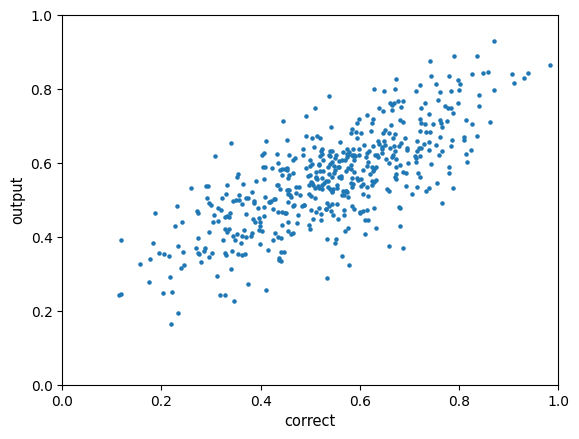

corr= 0.7489146852930784
MAE= 0.08751678394 ± 0.06568145755595493
相関係数: 0.7489146852930783
p値: 4.8182793064049317e-91


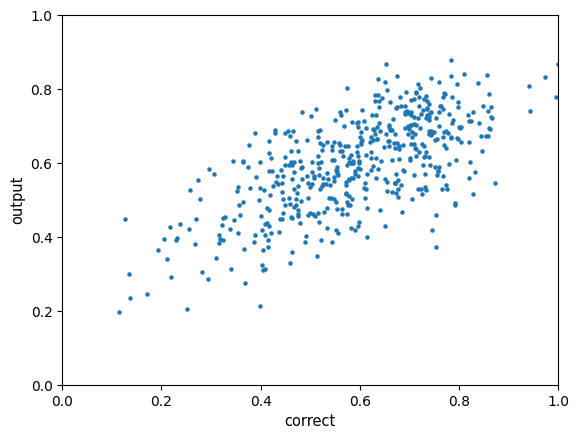

corr= 0.671186789778417
MAE= 0.095431251732 ± 0.07324172357355804
相関係数: 0.6711867897784176
p値: 9.523561220586917e-67


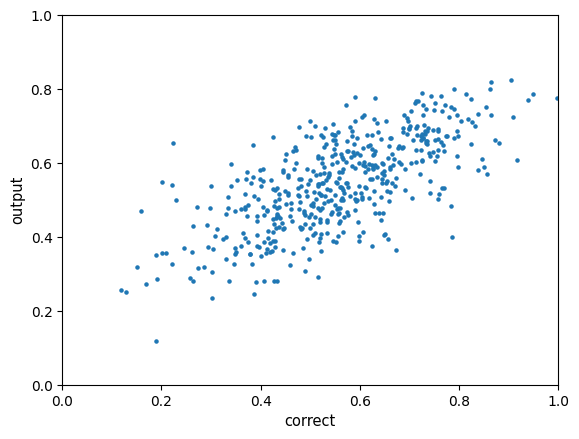

corr= 0.69658325856644
MAE= 0.089105717692 ± 0.0701156878752082
相関係数: 0.6965832585664401
p値: 7.966769173857925e-74


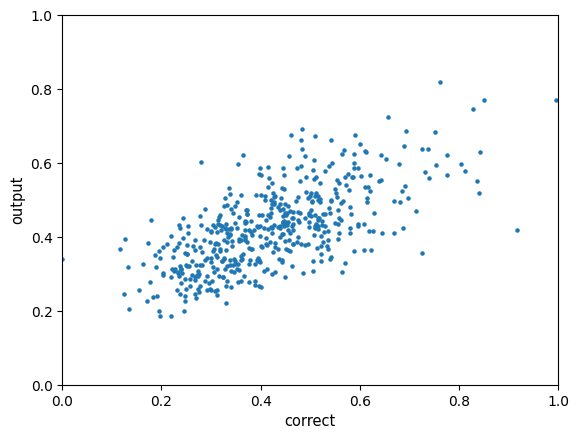

corr= 0.66753557682973
MAE= 0.084333435072 ± 0.06876877723321204
相関係数: 0.6675355768297299
p値: 8.685810357785029e-66


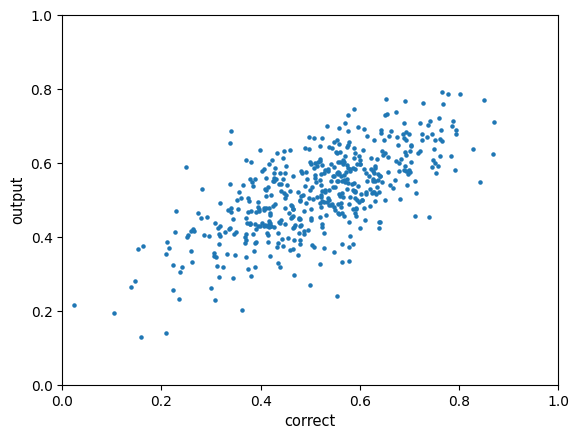

corr= 0.6837689385247414
MAE= 0.083460471904 ± 0.06302319976095906
相関係数: 0.6837689385247415
p値: 3.6532734495147385e-70


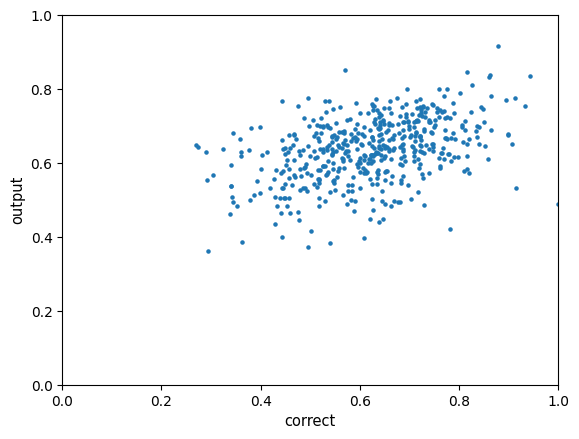

corr= 0.42443316144709026
MAE= 0.09457213014000002 ± 0.07736795918346094
相関係数: 0.4244331614470903
p値: 2.767915689317433e-23


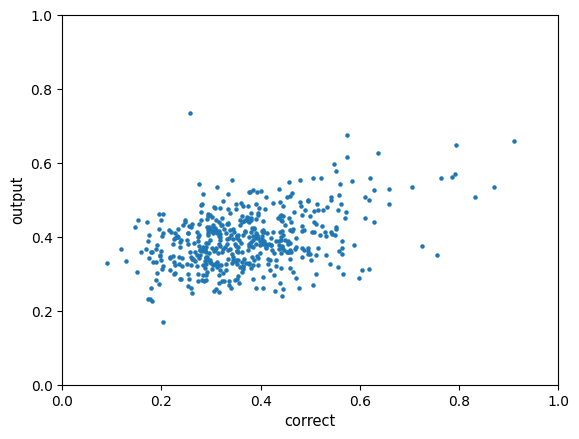

corr= 0.4046527189246629
MAE= 0.09320946016 ± 0.07198316847177694
相関係数: 0.40465271892466254
p値: 4.019682551677323e-21


In [36]:
mae_df = abs(test_out_df-test_score_df)
save_path = save_dir

out_df = test_out_df    
score_df = test_score_df

for i in range(len(col)):
    fig = plt.figure()
    plt.scatter(score_df[col[i]],
                out_df[col[i]],
                label=col[i],s=5)
                
    #plt.title("corr_score to output")
    plt.xlabel("correct",fontsize=10.5,fontname="Times New Roman")
    plt.ylabel("output",fontsize=10.5,fontname="Times New Roman")
    plt.xlim(0,1)
    plt.ylim(0,1)
    #plt.legend()
    #plt.savefig(save_path+f"/corr_{col[i]}.svg")
    plt.show()

    #plt.clf() # 図全体をクリア
    #plt.cla() # 軸をクリア
    #plt.close('all') # closes all the figure windows
    print("corr=",np.corrcoef(score_df[col[i]],out_df[col[i]])[0,1])
    print("MAE=", mae_df[col[i]].mean(), "±", mae_df[col[i]].std())
    a, b = pearsonr(score_df[col[i]], out_df[col[i]]) # リストを整形し相関係数:aとp値:bの計算
    print("相関係数:", a)
    print("p値:", b)

# Plot corr

factor 0
test correlation coefficient : 0.749


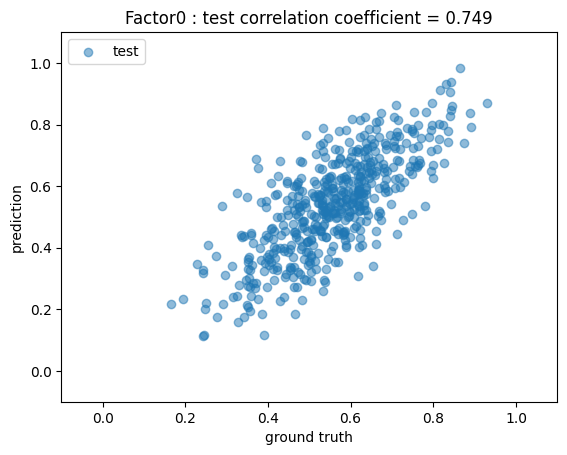

factor 1
test correlation coefficient : 0.671


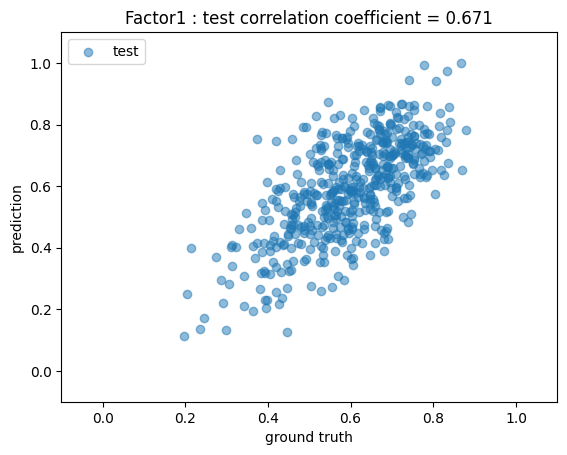

factor 2
test correlation coefficient : 0.697


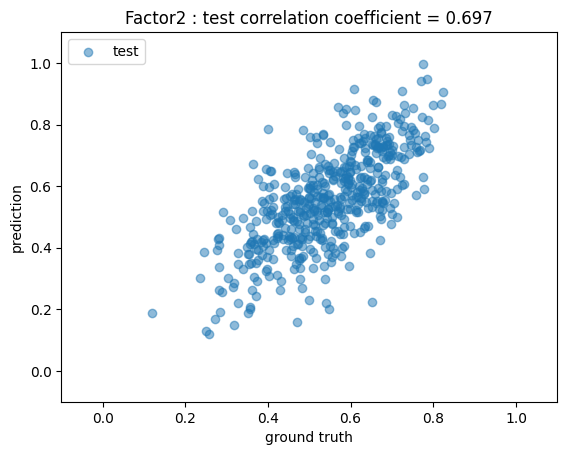

factor 3
test correlation coefficient : 0.668


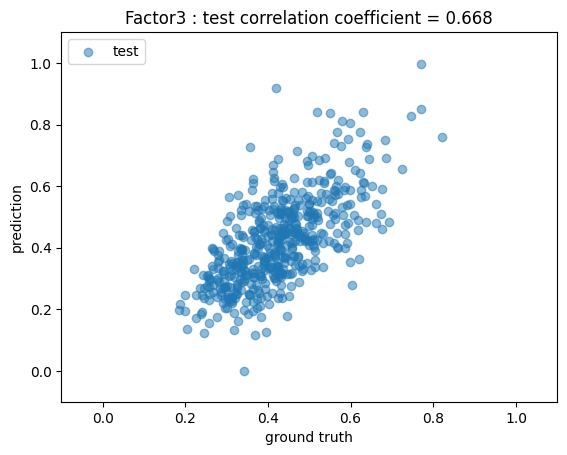

factor 4
test correlation coefficient : 0.684


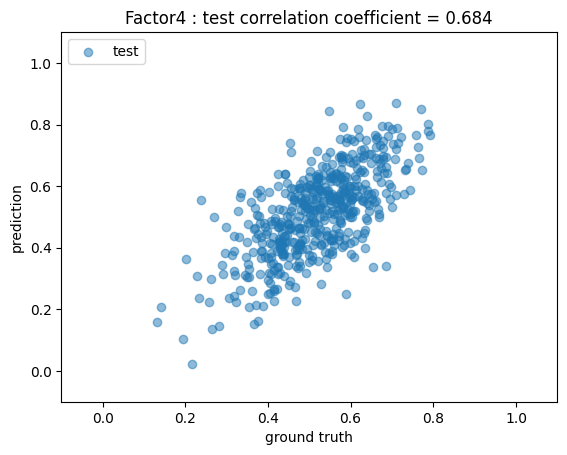

factor 5
test correlation coefficient : 0.424


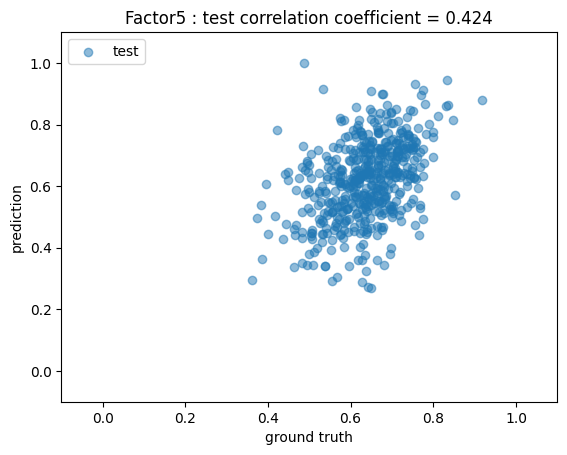

factor 6
test correlation coefficient : 0.405


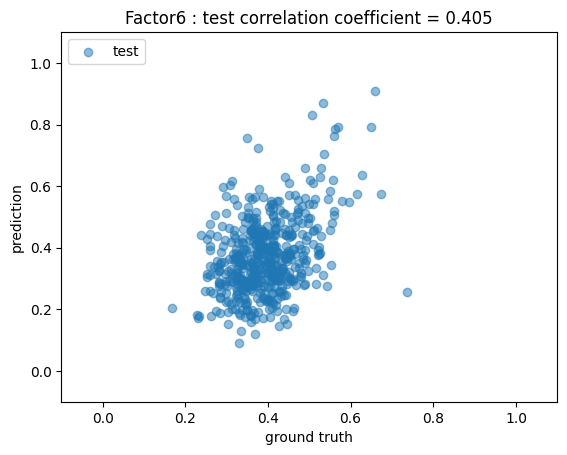

In [31]:
k = 7
# corr_train = df_train.corr()
corr_test = df_test.corr()
#corr_test = df_test0.corr()

if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_dir = save_dir + 'graph/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for i in range(0, k):
    plt.scatter(df_test.iloc[:,i], df_test.iloc[:,i+k], alpha=0.5, label = 'test', c='tab:blue')

    plt.xlabel('ground truth')
    plt.ylabel('prediction')
    
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    
    print(f'factor {i}')
    # print(f'train correlation coefficient: {corr_train.iloc[i, i+k].round(3)}')
    print(f'test correlation coefficient : {corr_test.iloc[i, i+k].round(3)}')
    
    plt.title(f'Factor{i} : test correlation coefficient = {corr_test.iloc[i, i+k].round(3)}')
    plt.legend(loc='upper left')
    
    plt.savefig(save_dir + f'scatter_factor{i+1}.png')
    plt.show()

# Calc MAE

In [6]:
ae_train_list = []
mae_train_list = []
std_train_list = []
ae_test_list = []
mae_test_list = []
std_test_list = []

for i in range(0, k):
#     ae_train = abs(df_train.iloc[:,i+1]-df_train.iloc[:,i+k+1])
#     ae_train_list.append(ae_train)
#     mae_train_list.append(ae_train.mean())
#     std_train_list.append(ae_train.std())
    
    ae_test = abs(df_test.iloc[:,i+1]-df_test.iloc[:,i+k+1])
    ae_test_list.append(ae_test)
    mae_test_list.append(ae_test.mean())
    std_test_list.append(ae_test.std())

# Plot AE

factor 1
test MAE : 0.12±0.09


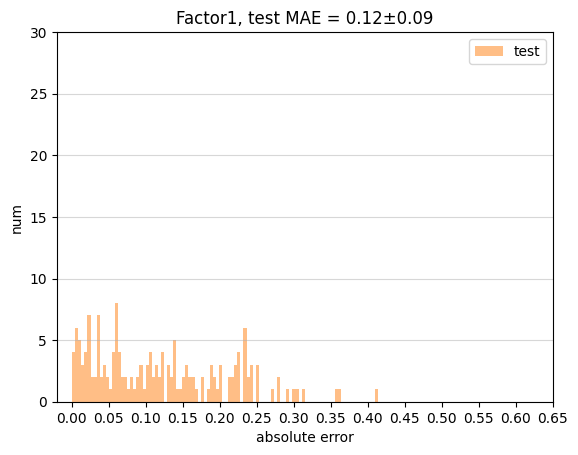

factor 2
test MAE : 0.242±0.167


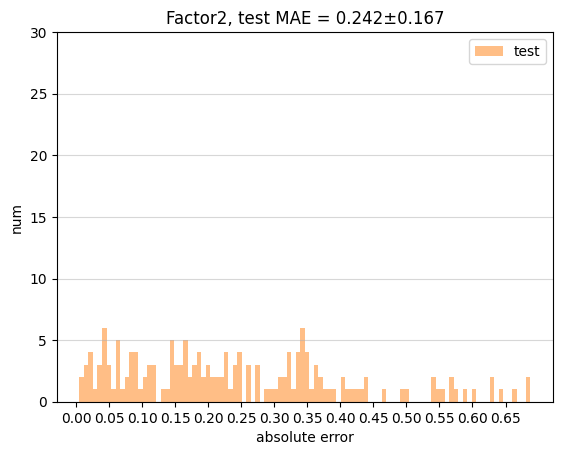

factor 3
test MAE : 0.237±0.173


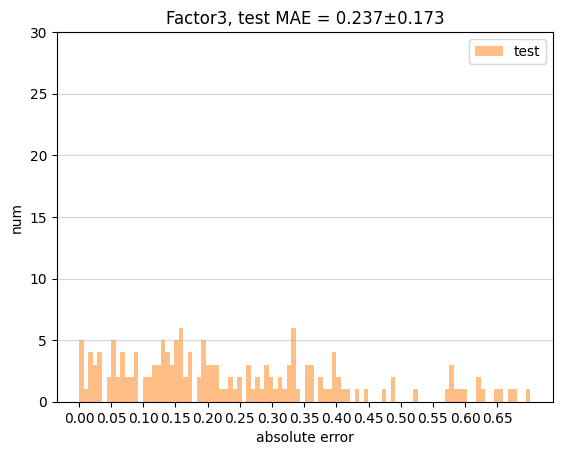

factor 4
test MAE : 0.234±0.168


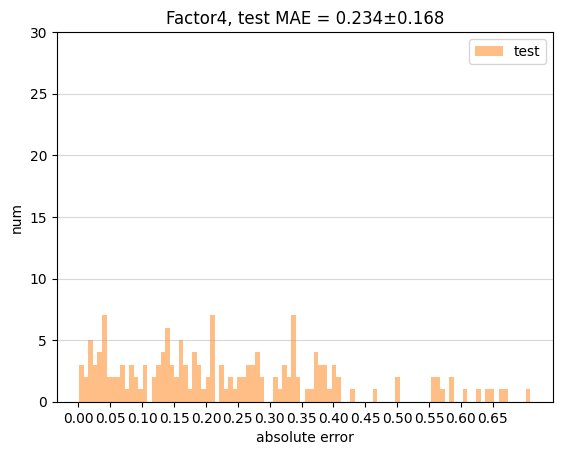

factor 5
test MAE : 0.246±0.169


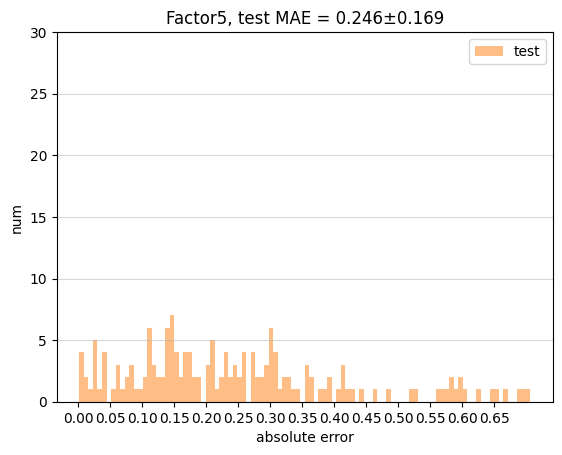

factor 6
test MAE : 0.12±0.098


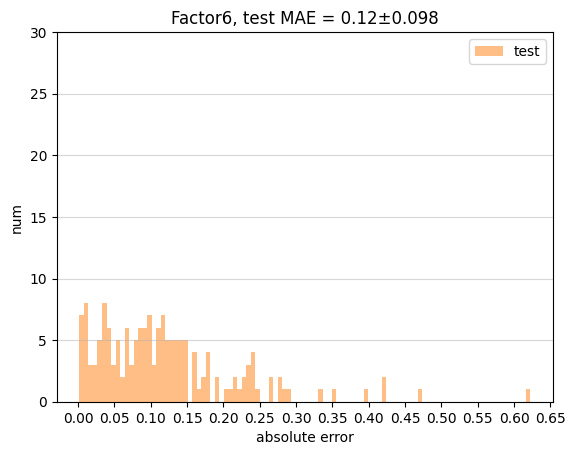

factor 7
test MAE : 0.178±0.122


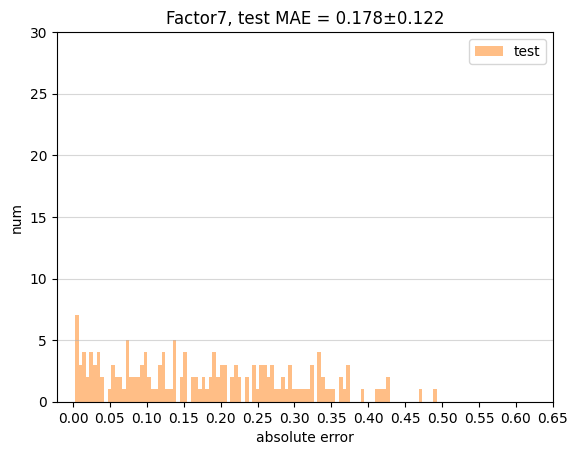

factor 8
test MAE : 0.184±0.15


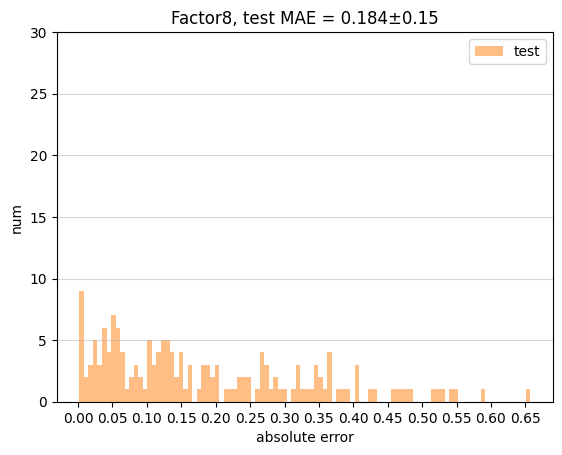

factor 9
test MAE : 0.149±0.111


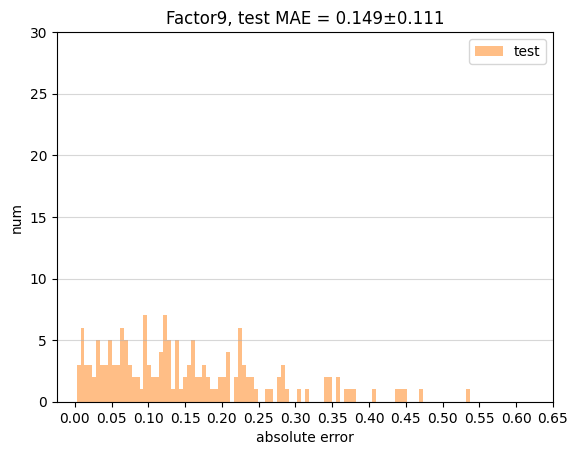

In [7]:
for i in range(k):    
    # plt.hist(ae_train_list[i], bins=100, alpha=0.5, label='train')
    plt.hist(ae_test_list[i], bins=100, alpha=0.5, label='test', color='tab:orange')
    plt.xticks(np.arange(0, 0.70, 0.05))
    plt.ylim(0,30)
    plt.grid(axis='y', alpha=0.5)
    plt.xlabel('absolute error')
    plt.ylabel('num')
    # plt.savefig('./figure')
    print(f'factor {i+1}')
    # print(f'train MAE: {mae_train_list[i].round(3)}±{std_train_list[i].round(3)}')
    print(f'test MAE : {mae_test_list[i].round(3)}±{std_test_list[i].round(3)}')

    plt.title(f'Factor{i+1}, test MAE = {mae_test_list[i].round(3)}±{std_test_list[i].round(3)}')

    plt.legend()
    
    # plt.savefig(f'../figure/hist_ae_factor{i+1}')
    plt.show()

# Rank AE

In [8]:
for i in range(k):
    if(i==0): ae_sum = ae_test_list[0]
    else: ae_sum += ae_test_list[i]

ae_sum_sorted = ae_sum.sort_values()
print(ae_sum_sorted)

43     0.380696
105    0.386903
132    0.486213
80     0.492508
66     0.494316
         ...   
13     3.524429
156    3.565308
78     3.612175
138    3.618025
18     3.732799
Length: 165, dtype: float64


# Plot radar chart

img20211018_14325352.png


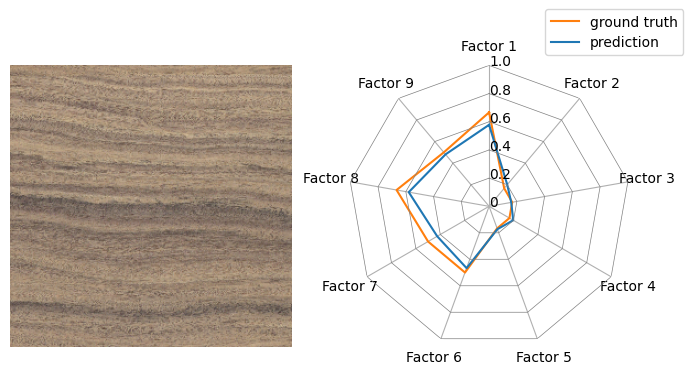

img20211004_09164798.png


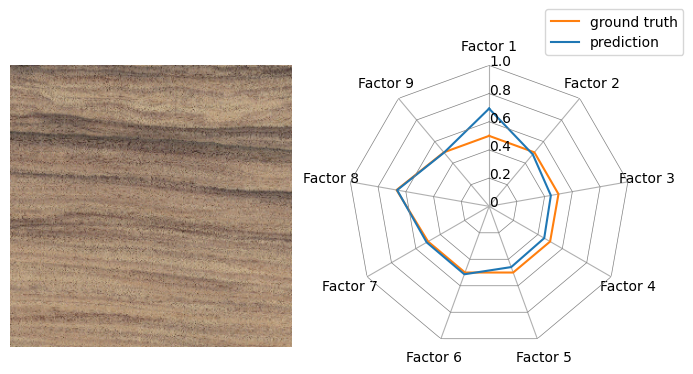

img20211018_14041595.png


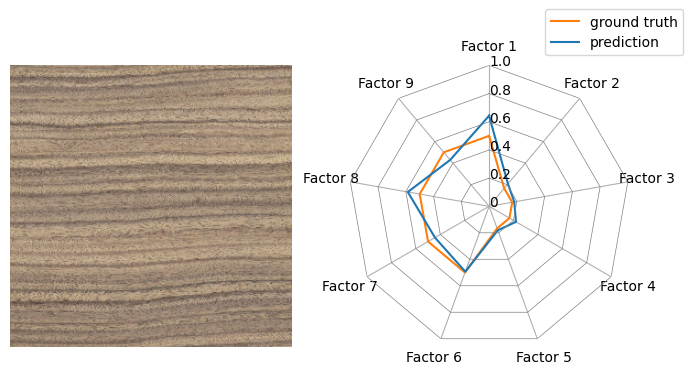

img20211005_08534760.png


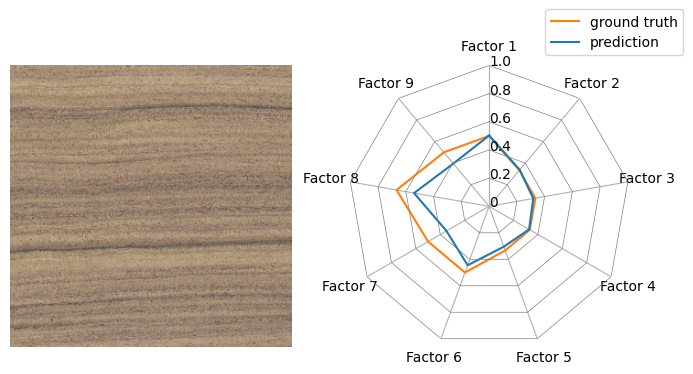

img20211018_13512048.png


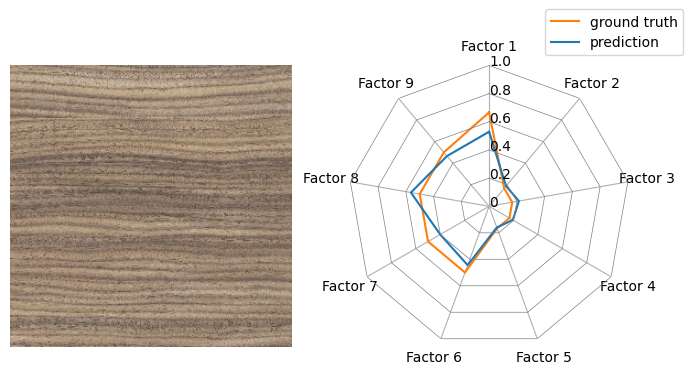

img20211004_09321655.png


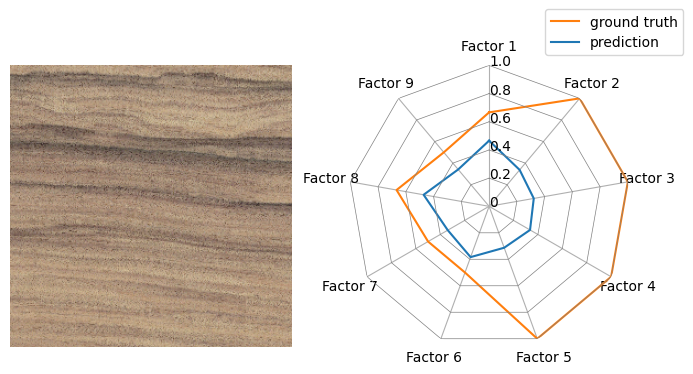

img20211004_09175473.png


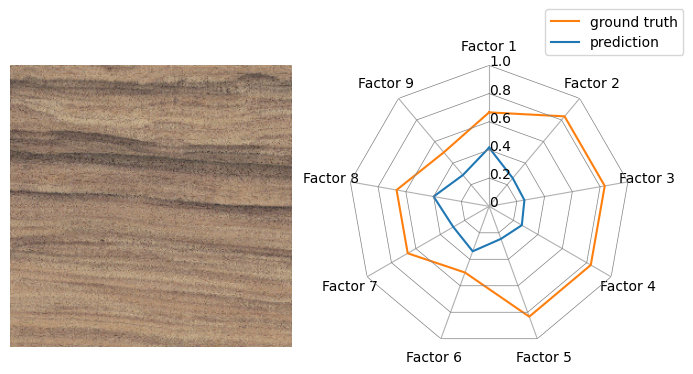

img20211004_09035548.png


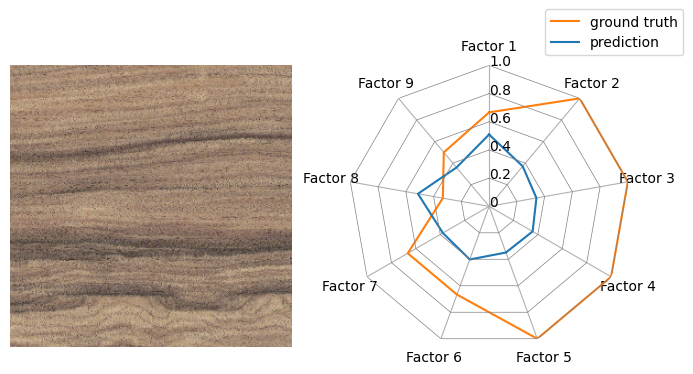

img20211004_09111432.png


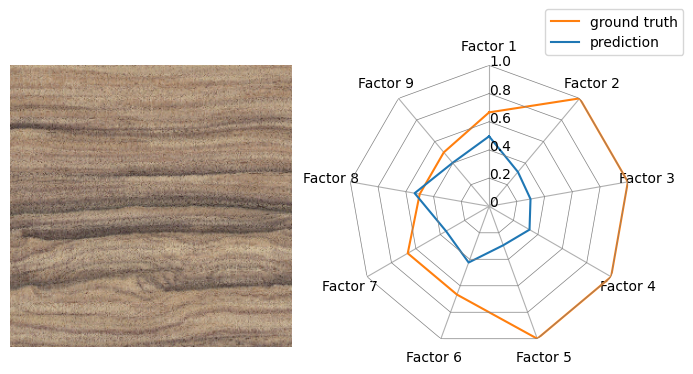

img20211018_14290190.png


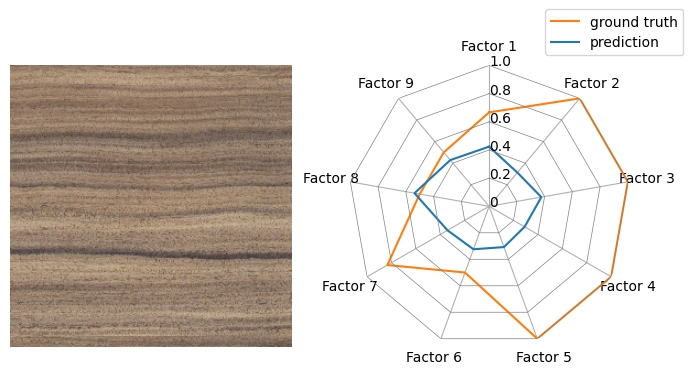

In [9]:
i = 121
index_list = [43,105,132,80,66,13,156,78,138,18]
cnt = 0

for i in index_list:

    img_path = '/dataset/dataset/taki/data/yamaha/pre-process_resize256/' + df_test.iloc[i, 0]
    img = Image.open(img_path)

    values = df_test.iloc[i,1:k+1].values
    preds = df_test.iloc[i,k+1:2*k+1].values
    labels = df_test.columns[1:k+1]


    radar_values = np.concatenate([values, [values[0]]])
    radar_preds = np.concatenate([preds, [preds[0]]])

    angles = np.linspace(0, 2 * np.pi, len(labels) + 1, endpoint=True)
    rgrids = [0, 0.2, 0.4, 0.6, 0.8, 1.0]


    fig = plt.figure(figsize=(8, 8))

    ax0 = fig.add_subplot(1, 2, 1)
    ax0.axis("off")
    ax0.imshow(img)
    print(df_test.iloc[i, 0])

    ax1 = fig.add_subplot(1, 2, 2, polar=True)
    ax1.plot(angles, radar_values, color='tab:orange', label='ground truth')
    ax1.plot(angles, radar_preds, color='tab:blue', label='prediction')
    ax1.set_thetagrids(angles[:-1] * 180 / np.pi, labels)
    ax1.set_rgrids([])
    ax1.spines['polar'].set_visible(False)
    ax1.set_theta_zero_location("N")
    ax1.set_theta_direction(-1)

    for grid_value in rgrids:
        grid_values = [grid_value] * (len(labels)+1)
        ax1.plot(angles, grid_values, color="gray",  linewidth=0.5)

    for t in rgrids:
        ax1.text(x=0, y=t, s=t)

    ax1.set_rlim([min(rgrids), max(rgrids)])
    # ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,)
    ax1.legend(bbox_to_anchor=(0.7, 1.2), loc='upper left', borderaxespad=0,)

    plt.savefig(f'radarchart_{cnt}')
    #plt.title(f"radarchart_{i}" )
    plt.show()
    cnt = cnt+1